In [1]:
# !pip install git+https://github.com/Koziev/rusyllab

In [2]:
import rusyllab

from os import listdir
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

import pickle
import numpy as np

In [3]:
texts = [pickle.load(open(f'clean_files/{filename}', 'rb'))['text']\
             for filename in listdir('clean_files')]

In [4]:
def calc_menzerat_for_wlen_slogs(texts):
    x = []
    wlen2sloglen = dict()

    for text in tqdm(texts):
        for word in text.split():
            slogs = rusyllab.split_word(word)
            wlen = len(slogs)
    #         x.append(wlen)
            if wlen not in wlen2sloglen:
                wlen2sloglen[wlen] = []
            for s in slogs:
                wlen2sloglen[wlen].append(len(str.strip(s)))
    x = np.array(list(wlen2sloglen.keys()))
    x.sort()
    y = np.array([np.array(wlen2sloglen[wlen]).mean() for wlen in x])
    
    return x, y

In [5]:
x, y = calc_menzerat_for_wlen_slogs(texts)

In [6]:
def plot_menzerat_law(x, y, title, cutoff=30):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.plot(x[:cutoff], y[:cutoff])
    plt.show()

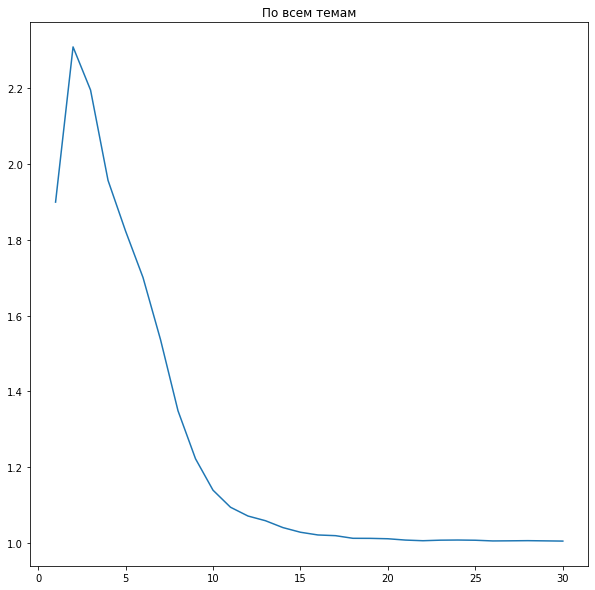

In [7]:
plot_menzerat_law(x, y, "По всем темам")